# EyeSwipe2 Data Analysis

This is an initial analysis of the data collected in the experiment comparing EyeSwipe1 to EyeSwipe2. The 13 participants performed 16 (distributed equally in 4 different days) 5-minute sessions with each keyboard. After each typing session the participants performed a layout expertise session with half of the keys in the keyboard. The two layout modes (hidden or visible) alternated after each typing session.

Some participants had problems with the calibration in all sessions and will be removed from the analysis. Other participants had calibration problems in specific days or sessions. We still have to decide how to handle these cases.

## Interacting with the visualizations

The plots are interactive, but GitHub can't display the interactive widgets. To be able to interact with the data you will need to clone this repository and run jupyter notebook from the root folder. 

You can use the controls to hide/show data from a particular participant.

In [1]:
%matplotlib notebook
# Imports
import pandas as pd
from data_handler import load_data, compute_mean_values, DataPlotter

typing_df, gesture_df, layout_df, participants = load_data()

# Remove participants with severe calibration problems
participants.remove('A04')
participants.remove('A08')
participants.remove('A09')
participants.remove('A11')
typing_df = typing_df[typing_df['participant_id'].isin(participants)]
gesture_df = gesture_df[gesture_df['participant_id'].isin(participants)]
layout_df = layout_df[layout_df['participant_id'].isin(participants)]


## Sentence count

The following plot shows the number sentences typed by each participant.

<IPython.core.display.Javascript object>


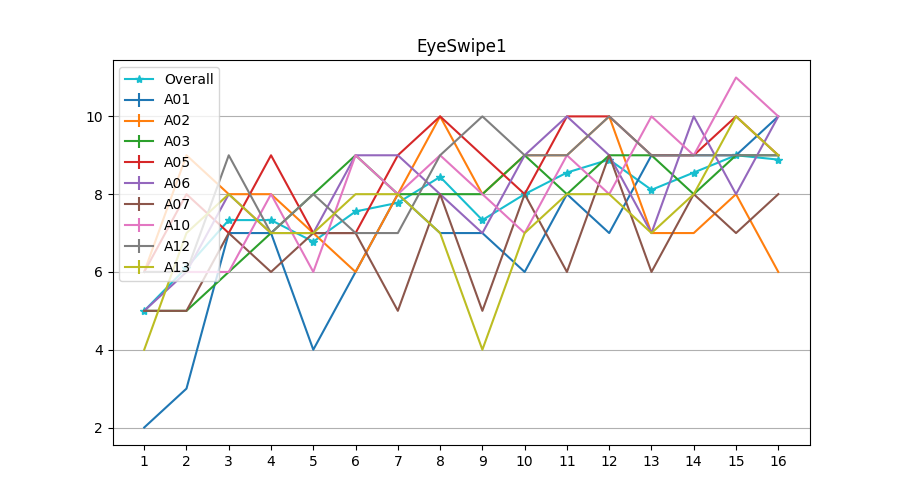

<IPython.core.display.Javascript object>


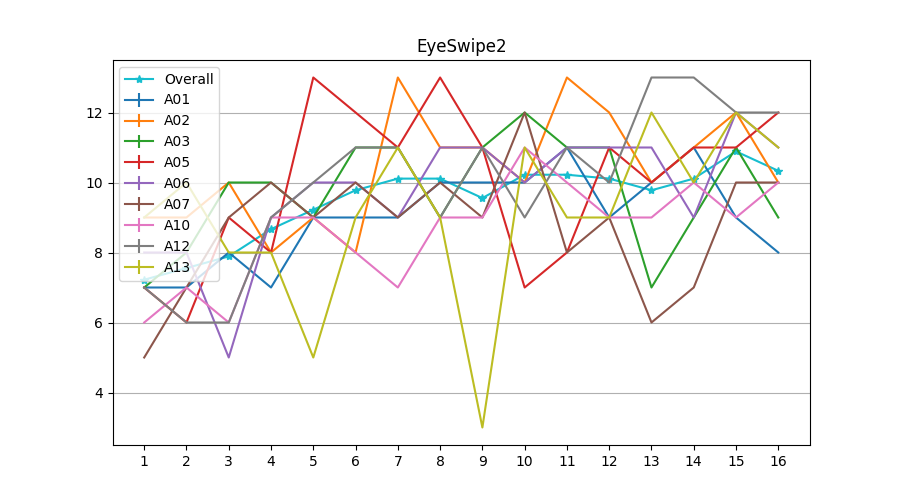

In [12]:
sentence_count = typing_df.groupby(('participant_id', 'mode_id', 'session_id'))['trial_id'].count().reset_index()
sentence_count.rename(columns={'trial_id': 'trials'}, inplace=True)
DataPlotter('trials', sentence_count, participants).show()

## Words Per Minute (wpm)

The word per minute (wpm) rate is shown in the figure below.

<IPython.core.display.Javascript object>


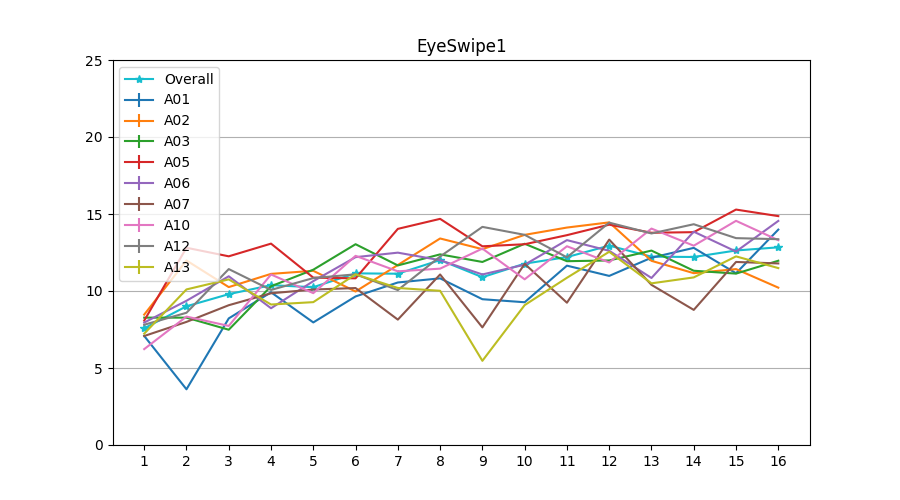

<IPython.core.display.Javascript object>


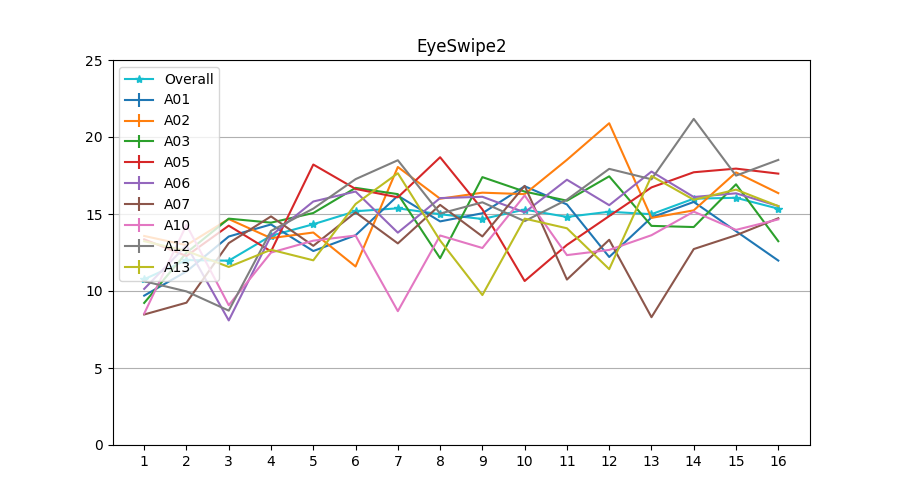

In [2]:
DataPlotter('wpm', typing_df, participants).show(ylim=(0, 25))

### Mean wpm per session

In [3]:
wpm1 = compute_mean_values(typing_df, 'eyeswipe1', 'wpm')
wpm1.columns = ['EyeSwipe1 (wpm)']
wpm2 = compute_mean_values(typing_df, 'eyeswipe2', 'wpm')
wpm2.columns = ['EyeSwipe2 (wpm)']
pd.concat([wpm1, wpm2], axis=1, join='inner')


,EyeSwipe1 (wpm),EyeSwipe2 (wpm)
session_id,,
1,7.576323,10.762957
2,9.007117,12.007915
3,9.794918,11.968313
4,10.378821,13.586039
5,10.248143,14.335905
6,11.145737,15.179085
7,11.122374,15.369142
8,12.007789,14.984717
9,10.896243,14.675383


## Error rate

The Minimum String Distance (MSD) error rate is computed using the Levenshtein distance (MSD) between the typed and expected sentences. It is given by:

\begin{equation}
    ErrorRate = \frac{MSD(typed, expected)}{\max(|typed|, |expected|)}
\end{equation}

<IPython.core.display.Javascript object>


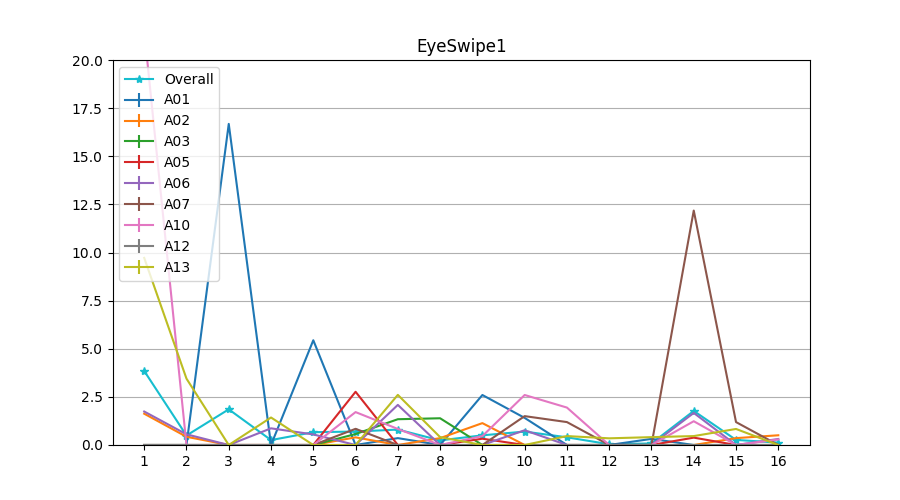

<IPython.core.display.Javascript object>


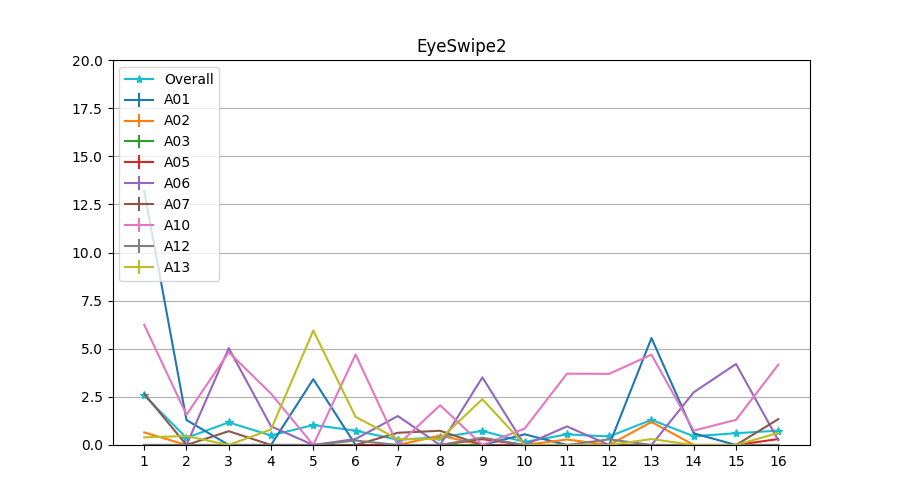

In [4]:
# Compute length of typed and expected sentences
typing_df['lexp'] = typing_df['expected_sentence'].str.len()
typing_df['ltyp'] = typing_df['typed_sentence'].str.len()
# Compute MSD error rate
typing_df['error rate'] = typing_df.msd / typing_df[['lexp', 'ltyp']].max(axis=1) * 100
# Plot
DataPlotter('error rate', typing_df, participants).show(ylim=(0, 20))

## Selection count

The number of selections before a key was chosen is shown in the next figure. This information should be considered in combination with the following plot, because the participant might have made few selections, but chosen the wrong letter.

<IPython.core.display.Javascript object>


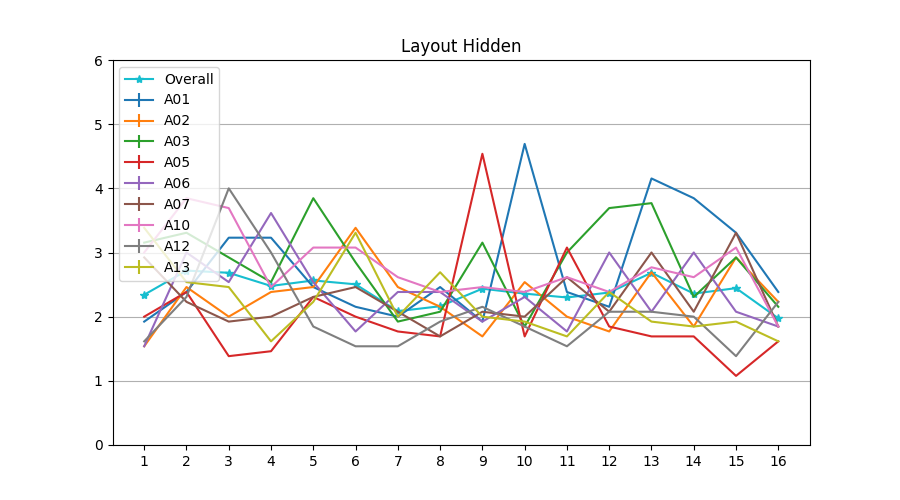

<IPython.core.display.Javascript object>


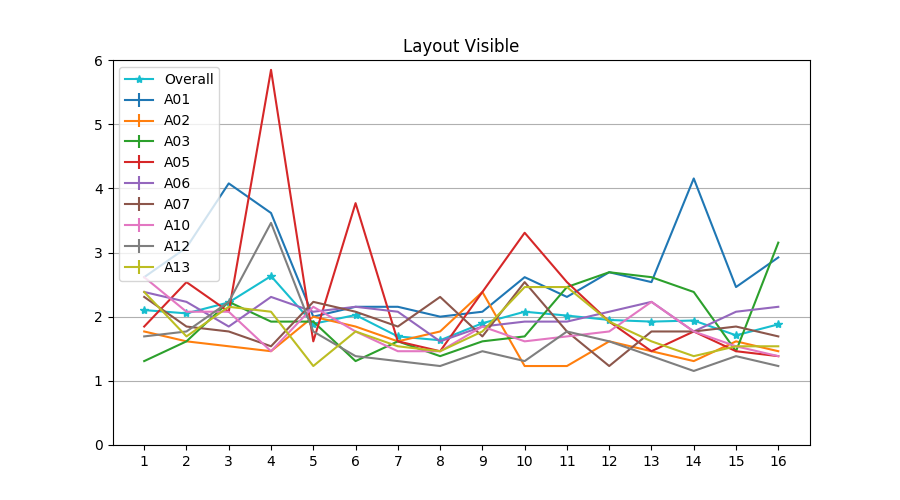

In [5]:
DataPlotter('selection_count', layout_df, participants).show(ylim=(0, 6))

## Distance to target

The distance (in pixels) between the center of the selected key to the center of the target key is shown in the plot below. The key width/height was about 100 px. The error was clearly larger for the hidden condition, as expected.

<IPython.core.display.Javascript object>


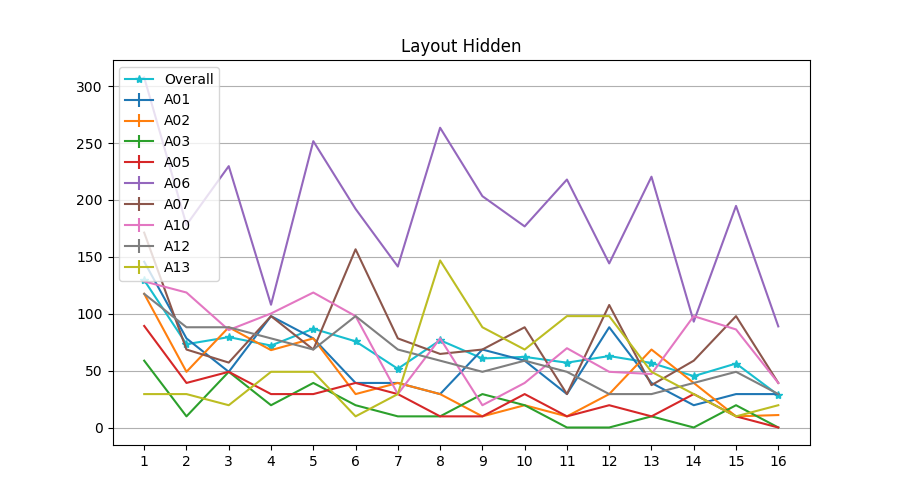

<IPython.core.display.Javascript object>


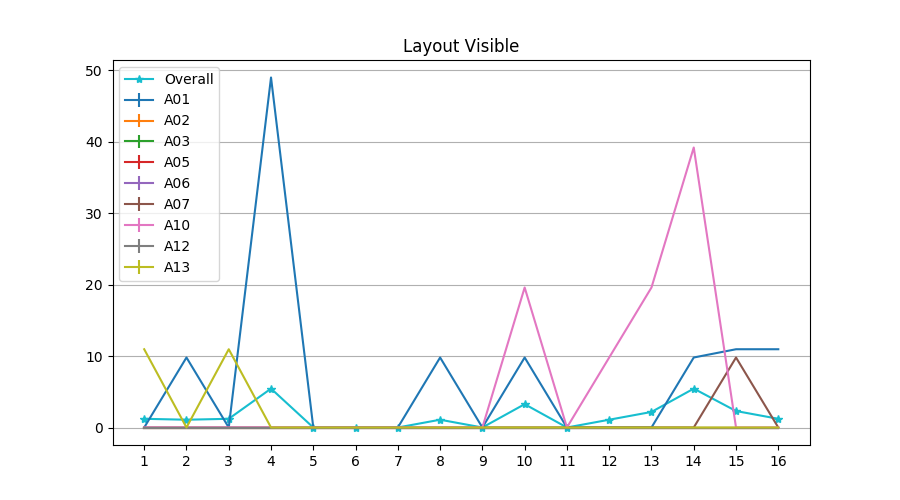

In [6]:
DataPlotter('distance_to_target', layout_df, participants).show()

<IPython.core.display.Javascript object>


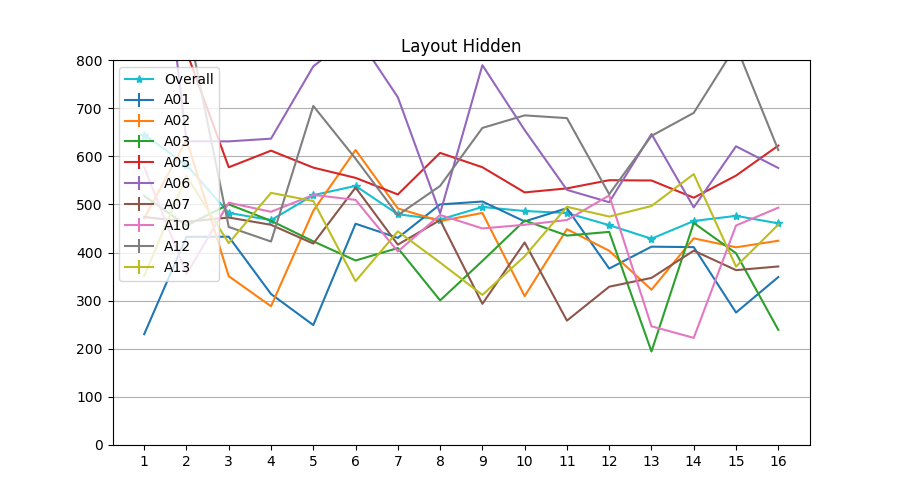

<IPython.core.display.Javascript object>


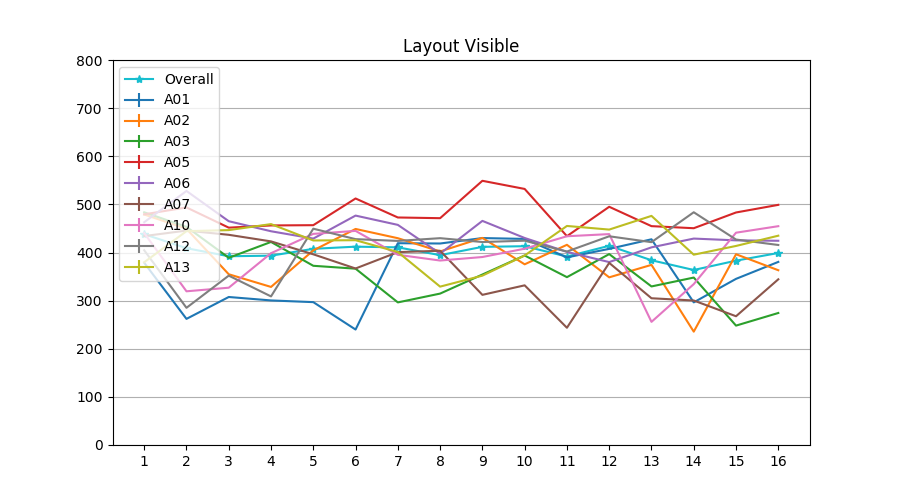

In [7]:
DataPlotter('reaction_time', layout_df, participants).show(ylim=(0, 800))

## Some considerations

Some participants had to recalibrate between the typing and layout sessions or even during the layout sessions. For this reason we may not be able to use their data to evaluate the dynamic calibration.